# Lasso Regression Implementation without libraries 

CS-353 Machine Learning Lab Report <br>
Shashank D &emsp;&nbsp; 181CO248 <br>
Tarun S Anur &emsp; 181CO255 <br>

## Lasso Regression Model Definition

In [1]:
# Importing libraries
import numpy as np

# Lasso Regression
class LassoRegression():
    
    def __init__(self, learning_rate, iterations, l1_penalty):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l1_penalty = l1_penalty

    # Function for model training
    def fit(self, X, Y):
        self.m, self.n = X.shape
        
        # weight initialization
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        # gradient descent learning
        for i in range(self.iterations):
            self.update_weights()
        return self
    
    # Function to update weights during gradient descent
    def update_weights(self):
        Y_pred = self.predict(self.X)
        
        # calculating the gradients
        dW = np.zeros(self.n)
        for j in range(self.n):
            if self.W[j] > 0 :
                 dW[j] = (-(2 * (self.X[:,j]).dot(self.Y - Y_pred)) + self.l1_penalty) / self.m
            else:
                 dW[j] = (-(2 * (self.X[:,j]).dot(self.Y - Y_pred)) - self.l1_penalty) / self.m
        
        db = -2 * np.sum(self.Y - Y_pred) / self.m

        # update weights
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        return self
    
    def predict(self, X):
        return X.dot(self.W) + self.b

## Dataset Import

In [2]:
import pandas as pd

df = pd.read_excel("salary_data.xlsx")

## Dataset Cross-Validation

In [3]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

## Model training

In [4]:
model = LassoRegression(iterations = 1000, learning_rate = 0.01, l1_penalty = 500)
_ = model.fit( X_train, Y_train )

## Prediction on the Test Dataset

In [5]:
Y_pred = model.predict(X_test)
print("Predicted values ", np.round(Y_pred, 0))
print("Real values      ", np.round(Y_test, 0))
print("Trained W ", round( model.W[0], 2))
print("Trained b ", round( model.b, 2))

Predicted values  [ 40733. 123884.  65300.  63410. 116325. 108766. 117270.  64355.]
Real values       [ 37731 112391  57081  63218 116969 109431 112635  55794]
Trained W  9449.01
Trained b  26559.14


## Graph Plotting for the Test Dataset

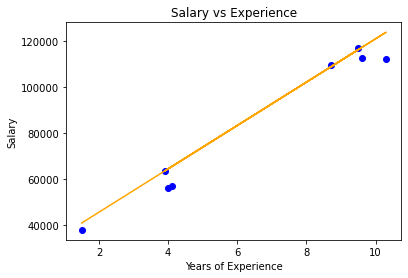

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X_test, Y_test, color = 'blue')
plt.plot(X_test, Y_pred, color = 'orange')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Performance Measurements

In [7]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

print('Mean Squared Error =', round(mse(Y_test, Y_pred), 2))
print('Root Mean Squared Error =', round(mse(Y_test, Y_pred, squared=False), 2))
print('Mean Absolute Error =', round(mae(Y_test, Y_pred), 2))

Mean Squared Error = 38039873.53
Root Mean Squared Error = 6167.65
Mean Absolute Error = 4676.44
